<a href="https://colab.research.google.com/github/Ashish542004/BingeBuzz/blob/main/BingeBuzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')



In [6]:
movies.head(1)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [ ]:
credits.head(1)['cast'].values



In [8]:
movies = movies.merge(credits,on='title')


In [9]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [10]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
movies.isnull().sum()

,0
movie_id,0
title,0
overview,3
genres,0
keywords,0
cast,0
crew,0


In [12]:
movies.dropna(inplace=True)

In [13]:
movies.duplicated().sum()

np.int64(0)

In [ ]:
movies.iloc[0].genres

In [15]:
#[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
# to convert in format [Action , adventure, fantast, scifi]

In [16]:
def convert(obj):
  L=[]
  for i in ast.literal_eval(obj):
    L.append(i['name'])
  return L

In [ ]:
import ast
ast.literal_eval
# to convert the string of list into a list we use this inbuilt module

In [18]:
movies['genres']=movies['genres'].apply(convert)


In [19]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [21]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L

In [22]:
movies['cast']=movies['cast'].apply(convert3)

In [23]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [24]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [25]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [26]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [27]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [28]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [29]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [30]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [31]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [32]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [33]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [34]:
new_df=movies[['movie_id','title','tags']]

In [35]:
# new_df['tags'].apply(lambda x:" ".join(x))

In [ ]:
new_df['tags'][0]

In [ ]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x).lower())


In [38]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [39]:
!pip install nltk

In [40]:
#natural language processing library
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [41]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
new_df['tags']=new_df['tags'].apply(stem)

In [43]:
new_df['tags'][0]


'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [45]:
vector = cv.fit_transform(new_df['tags']).toarray()
# to convert in numpy array

In [46]:
vector.shape

(4806, 5000)

In [47]:
cv.get_feature_names_out()


array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
similarity = cosine_similarity(vector)

In [50]:
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [51]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    #reverse to find the distance in descending order and enumerate function turns it into a
    #list of tuples so the index is not lost and lambda for sorting on the basis of second number
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [52]:
recommend('Batman Begins')

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


In [53]:
import pickle
pickle.dump(new_df,open('movies.pkl','wb'))

In [54]:
new_df['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [ ]:
new_df.to_dict()

In [56]:
pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [57]:
pickle.dump(similarity,open('similarity.pkl','wb'))

COSINE SIMILARITY ANALYSIS BASED ON TF-IDF VECTORS
Dataset: 4806 movies
Similarity matrix shape: (4806, 4806)

COSINE SIMILARITY STATISTICS:
-----------------------------------
Mean Cosine Similarity: 0.0530 (5.30%)
Median Cosine Similarity: 0.0399 (3.99%)
Maximum Cosine Similarity: 0.9843 (98.43%)
Minimum Cosine Similarity: 0.0000 (0.00%)
Standard Deviation: 0.0541 (5.41%)

Average Cosine Similarity of Recommendations: 0.2895 (28.95%)
Average Top Recommendation Cosine Similarity: 0.3264 (32.64%)
Cosine Similarity Range in Recommendations: 0.1701 - 0.5592

COSINE SIMILARITY SUMMARY:
Overall Mean Cosine Similarity: 5.30%
Average Recommendation Cosine: 28.95%

CREATING RECOMMENDATION COSINE SIMILARITY DISTRIBUTION CHART...
Visualizations saved as 'cosine_similarity_distribution.png'


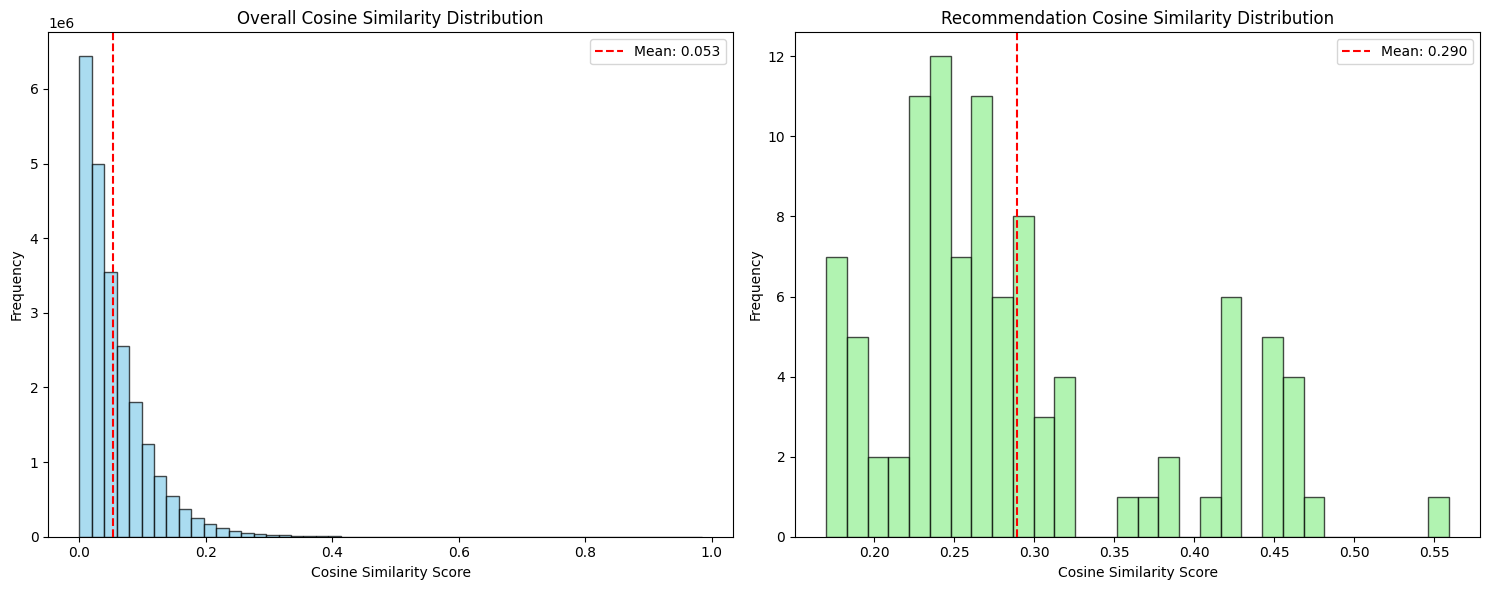


TESTING SPECIFIC COSINE SIMILARITIES:
----------------------------------------

Cosine Similarities for: Batman Begins
--------------------------------------------------
Top 5 recommendations with cosine similarity scores:
  1. The Dark Knight
     Cosine Similarity: (40.22%)
  2. Batman
     Cosine Similarity: (35.43%)
  3. Batman
     Cosine Similarity: (33.41%)
  4. The Dark Knight Rises
     Cosine Similarity: (31.77%)
  5. 10th & Wolf
     Cosine Similarity: (31.20%)

Cosine Similarities for: The Dark Knight
--------------------------------------------------
Top 5 recommendations with cosine similarity scores:
  1. The Dark Knight Rises
     Cosine Similarity: (42.26%)
  2. Batman Begins
     Cosine Similarity: (40.22%)
  3. Batman Returns
     Cosine Similarity: (33.14%)
  4. Batman Forever
     Cosine Similarity: (29.41%)
  5. Batman
     Cosine Similarity: (27.67%)

Cosine Similarities for: Inception
--------------------------------------------------
Top 5 recommendations with

In [78]:
# ============================================================================
# CLEAN COSINE SIMILARITY ANALYSIS - Add this to your notebook
# ============================================================================

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

print("COSINE SIMILARITY ANALYSIS BASED ON TF-IDF VECTORS")
print("=" * 60)

# Load your model data
new_df = pickle.load(open('movies.pkl', 'rb'))
similarity = pickle.load(open('similarity.pkl', 'rb'))

print(f"Dataset: {len(new_df)} movies")
print(f"Similarity matrix shape: {similarity.shape}")

# Extract cosine similarity scores (excluding diagonal)
print("\nCOSINE SIMILARITY STATISTICS:")
print("-" * 35)

cosine_scores = []
for i in range(len(similarity)):
    for j in range(len(similarity)):
        if i != j:  # Exclude self-similarity (diagonal)
            cosine_scores.append(similarity[i][j])

cosine_scores = np.array(cosine_scores)

# Calculate statistics
mean_cosine = np.mean(cosine_scores)
median_cosine = np.median(cosine_scores)
max_cosine = np.max(cosine_scores)
min_cosine = np.min(cosine_scores)
std_cosine = np.std(cosine_scores)

print(f"Mean Cosine Similarity: {mean_cosine:.4f} ({mean_cosine*100:.2f}%)")
print(f"Median Cosine Similarity: {median_cosine:.4f} ({median_cosine*100:.2f}%)")
print(f"Maximum Cosine Similarity: {max_cosine:.4f} ({max_cosine*100:.2f}%)")
print(f"Minimum Cosine Similarity: {min_cosine:.4f} ({min_cosine*100:.2f}%)")
print(f"Standard Deviation: {std_cosine:.4f} ({std_cosine*100:.2f}%)")

# Sample movies for analysis
sample_size = 20
sample_movies = new_df.sample(sample_size, random_state=42)

recommendation_cosine_scores = []
top_recommendation_scores = []

for idx, movie in sample_movies.iterrows():
    movie_idx = new_df[new_df['title'] == movie['title']].index[0]

    # Get top 5 recommendations
    distances = sorted(list(enumerate(similarity[movie_idx])),
                     reverse=True, key=lambda x: x[1])
    top_recommendations = distances[1:6]  # Exclude self

    # Extract cosine similarity scores
    for rec_idx, cosine_score in top_recommendations:
        recommendation_cosine_scores.append(cosine_score)

    # Store top recommendation score
    top_recommendation_scores.append(top_recommendations[0][1])

# Calculate recommendation metrics
avg_recommendation_cosine = np.mean(recommendation_cosine_scores)
avg_top_cosine = np.mean(top_recommendation_scores)

print(f"\nAverage Cosine Similarity of Recommendations: {avg_recommendation_cosine:.4f} ({avg_recommendation_cosine*100:.2f}%)")
print(f"Average Top Recommendation Cosine Similarity: {avg_top_cosine:.4f} ({avg_top_cosine*100:.2f}%)")
print(f"Cosine Similarity Range in Recommendations: {min(recommendation_cosine_scores):.4f} - {max(recommendation_cosine_scores):.4f}")

# Final summary
print("\nCOSINE SIMILARITY SUMMARY:")
print("=" * 40)
print(f"Overall Mean Cosine Similarity: {mean_cosine*100:.2f}%")
print(f"Average Recommendation Cosine: {avg_recommendation_cosine*100:.2f}%")

# Create distribution chart
print("\nCREATING RECOMMENDATION COSINE SIMILARITY DISTRIBUTION CHART...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Overall cosine similarity distribution
ax1.hist(cosine_scores, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Overall Cosine Similarity Distribution')
ax1.set_xlabel('Cosine Similarity Score')
ax1.set_ylabel('Frequency')
ax1.axvline(mean_cosine, color='red', linestyle='--',
            label=f'Mean: {mean_cosine:.3f}')
ax1.legend()

# 2. Recommendation cosine similarity distribution
ax2.hist(recommendation_cosine_scores, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.set_title('Recommendation Cosine Similarity Distribution')
ax2.set_xlabel('Cosine Similarity Score')
ax2.set_ylabel('Frequency')
ax2.axvline(avg_recommendation_cosine, color='red', linestyle='--',
            label=f'Mean: {avg_recommendation_cosine:.3f}')
ax2.legend()

plt.tight_layout()
plt.savefig('cosine_similarity_distribution.png', dpi=300, bbox_inches='tight')
print("Visualizations saved as 'cosine_similarity_distribution.png'")
plt.show()

# Test specific cosine similarities
print("\nTESTING SPECIFIC COSINE SIMILARITIES:")
print("-" * 40)

test_movies = ['Batman Begins', 'The Dark Knight', 'Inception']

for movie in test_movies:
    if movie in new_df['title'].values:
        print(f"\nCosine Similarities for: {movie}")
        print("-" * 50)

        movie_idx = new_df[new_df['title'] == movie].index[0]
        distances = sorted(list(enumerate(similarity[movie_idx])),
                         reverse=True, key=lambda x: x[1])

        print("Top 5 recommendations with cosine similarity scores:")
        for i, (idx, cosine_score) in enumerate(distances[1:6]):
            recommended_movie = new_df.iloc[idx]['title']
            print(f"  {i+1}. {recommended_movie}")
            print(f"     Cosine Similarity: ({cosine_score*100:.2f}%)")
    else:
        print(f"Movie '{movie}' not found in dataset")

print("\nCosine similarity analysis completed!")